### Analysing the commodities loading dataset - an analysis of US' international oil trades

In [124]:
import os
import pandas as pd
os.getcwd()

'C:\\Users\\Anantajit\\PycharmProjects\\CommoditiesLoading'

In [125]:
# Assuming the working directory is already set to the folder containing the Excel file
file_path = 'CommoditiesLoadingDataset.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe to verify
print(df.head())

   year  week destination_countryname         destination_portname  \
0  2012     1                  Angola           Kizomba A Terminal   
1  2012     1                   Aruba        Aruba Outer Anchorage   
2  2012     1                   Aruba  Aruba STS Transhipment Area   
3  2012     1               Australia                     Brisbane   
4  2012     1               Australia                     Brisbane   

  previous_loading_countryname    origin_countryname  \
0                    Singapore                Angola   
1                          NaN  Netherlands Antilles   
2                    Venezuela             Venezuela   
3                    Australia             Australia   
4                          NaN             Australia   

               origin_portname          continent  no_of_ships  loadedbarrels  \
0  Kizomba Terminals Anchorage             Africa            1      229101.10   
1                   Bullen Bay      North America            1      641610.49   

In [126]:
# Filter for international trades only for america
df_america_international = df[((df['origin_countryname'] == 'United States of America') & 
                                  (df['destination_countryname'] != 'United States of America')) | 
                                 ((df['destination_countryname'] == 'United States of America') & 
                                  (df['origin_countryname'] != 'United States of America'))]

# Display the first few rows of the filtered dataframe to verify
print(df_america_international.head())
print(len(df_america_international))

     year  week   destination_countryname       destination_portname  \
12   2012     1                   Bahamas         Freeport (Bahamas)   
103  2012     1                  Honduras              Puerto Cortes   
313  2012     1  United States of America                     Atreco   
317  2012     1  United States of America              Bayou Cosotte   
319  2012     1  United States of America  Big Stone Beach Anchorage   

    previous_loading_countryname        origin_countryname  \
12                           NaN  United States of America   
103                          NaN  United States of America   
313                          NaN                       NaN   
317                          NaN                       NaN   
319                          NaN                       NaN   

                      origin_portname      continent  no_of_ships  \
12   Burwood Bayou Transshipment Area  North America            1   
103                          Southtex  North America    

In [127]:
# Columns to drop
columns_to_drop = ['destination_portname', 'previous_loading_countryname', 'origin_portname', 'continent', 'no_of_ships', 'loadedbarrels_new', 'date']

# Drop the specified columns
df_columns_dropped = df_america_international.drop(columns=columns_to_drop, axis=1)

# Display the first few rows of the dataframe to verify the changes
print(df_columns_dropped.head())

     year  week   destination_countryname        origin_countryname  \
12   2012     1                   Bahamas  United States of America   
103  2012     1                  Honduras  United States of America   
313  2012     1  United States of America                       NaN   
317  2012     1  United States of America                       NaN   
319  2012     1  United States of America                       NaN   

     loadedbarrels  
12       718979.44  
103            NaN  
313            NaN  
317            NaN  
319            NaN  


In [128]:
df_columns_dropped.describe()

,year,week,loadedbarrels
count,10479.000000,10479.000000,5.233000e+03
mean,2014.145052,25.532207,6.676514e+05
std,1.664603,14.666044,5.154836e+05
min,2012.000000,1.000000,3.754940e+03
25%,2013.000000,13.000000,3.745579e+05
50%,2014.000000,25.000000,6.388434e+05
75%,2016.000000,38.000000,8.016831e+05
max,2017.000000,53.000000,4.555645e+06


In [129]:
# Check for missing values
print(df_columns_dropped.isnull().sum())

# Check for duplicate rows based on all columns

duplicates = df_columns_dropped.duplicated()

# Count the number of duplicate rows before
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows before: {num_duplicates}")

df_duplicates_dropped = df_columns_dropped.drop_duplicates()

# Check for duplicate rows based on all columns

duplicates = df_duplicates_dropped.duplicated()

# Count the number of duplicate rows after
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows after: {num_duplicates}")

year                          0
week                          0
destination_countryname     157
origin_countryname          153
loadedbarrels              5246
dtype: int64
Number of duplicate rows before: 1055
Number of duplicate rows after: 0


In [130]:
# Function to impute missing values based on the median for that week
def impute_median(group):
    # Calculate the median where the origin is USA
    median_origin_usa = group.loc[group['origin_countryname'] == 'United States of America', 'loadedbarrels'].median()
    # Calculate the median where the destination is USA
    median_destination_usa = group.loc[group['destination_countryname'] == 'United States of America', 'loadedbarrels'].median()
    
    # Impute missing values based on the condition
    for i, row in group.iterrows():
        if pd.isnull(row['loadedbarrels']):
            if row['origin_countryname'] == 'United States of America':
                group.at[i, 'loadedbarrels'] = median_origin_usa
            elif row['destination_countryname'] == 'United States of America':
                group.at[i, 'loadedbarrels'] = median_destination_usa
    return group

# Apply the imputation function to each group
df_imputed = df_duplicates_dropped.groupby(['year', 'week']).apply(impute_median)
df_imputed.head()

c:\users\anantajit\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\users\anantajit\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\users\anantajit\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


year  week   destination_countryname        origin_countryname  \
year week                                                                       
2012 1    12   2012     1                   Bahamas  United States of America   
          103  2012     1                  Honduras  United States of America   
          313  2012     1  United States of America                       NaN   
          343  2012     1  United States of America                 Gibraltar   
          346  2012     1  United States of America                       NaN   

               loadedbarrels  
year week                     
2012 1    12       718979.44  
          103      718979.44  
          313     1158776.93  
          343     1158776.93  
          346     1160706.56

In [131]:
print(df_imputed.isnull().sum()) # after median imputation

year                         0
week                         0
destination_countryname    155
origin_countryname          90
loadedbarrels               14
dtype: int64


In [132]:
df_imputed["loadedbarrels"] = df_imputed['loadedbarrels'].interpolate(method='linear')
df_cleaned = df_imputed.dropna(subset=['destination_countryname', 'origin_countryname'])
# just drop rows with missing entries in these columns

# Display the DataFrame to verify the changes
print(df_cleaned.isnull().sum()) # no. of missing values in each column

year                       0
week                       0
destination_countryname    0
origin_countryname         0
loadedbarrels              0
dtype: int64


In [133]:
df_reset = df_cleaned.reset_index(drop=True)

# Display the DataFrame to verify the changes
print(df_reset.head())

   year  week   destination_countryname        origin_countryname  \
0  2012     1                   Bahamas  United States of America   
1  2012     1                  Honduras  United States of America   
2  2012     1  United States of America                 Gibraltar   
3  2012     1  United States of America                     Aruba   
4  2012     1  United States of America            United Kingdom   

   loadedbarrels  
0      718979.44  
1      718979.44  
2     1158776.93  
3     1158776.93  
4     1158776.93  


In [134]:
# Aggregating loaded barrels by week and year where destination country is the USA
imports_usa_by_year_week = df_reset[df_reset['destination_countryname'] == 'United States of America'].groupby(['year', 'week'])['loadedbarrels'].sum().reset_index()
df_imports = imports_usa_by_year_week
# Display the aggregated DataFrame for demand
print("Total Import of Oil for the US for Each Week and Year:")
print(df_imports)

# Aggregating loaded barrels by week and year where origin country is the USA
exports_usa_by_year_week = df_reset[df_reset['origin_countryname'] == 'United States of America'].groupby(['year', 'week'])['loadedbarrels'].sum().reset_index()
df_exports = exports_usa_by_year_week
# Display the aggregated DataFrame for supply
print("Total Export of Oil for the US for Each Week and Year:")
print(df_exports)

Total Import of Oil for the US for Each Week and Year:
     year  week  loadedbarrels
0    2012     1    5791955.020
1    2012     2     367792.425
2    2012     3     158355.960
3    2012     4    6438023.550
4    2012     5    2876025.860
..    ...   ...            ...
301  2017    40     706182.910
302  2017    41     770406.880
303  2017    42     792800.170
304  2017    43     967841.280
305  2017    52    1185146.440

[306 rows x 3 columns]
Total Export of Oil for the US for Each Week and Year:
     year  week  loadedbarrels
0    2012     1   2.156938e+06
1    2012     2   1.212491e+07
2    2012     3   1.201279e+07
3    2012     4   2.258636e+07
4    2012     5   1.926817e+07
..    ...   ...            ...
302  2017    41   6.342459e+06
303  2017    42   3.829006e+06
304  2017    43   6.386664e+05
305  2017    44   1.043802e+06
306  2017    52   3.261036e+06

[307 rows x 3 columns]


In [135]:
# Creating a 'date' column from 'year' and 'week' for plotting
df_imports['date'] = pd.to_datetime(df_imports['year'].astype(str) + df_imports['week'].astype(str) + '1', format='%Y%W%w')
df_exports['date'] = pd.to_datetime(df_exports['year'].astype(str) + df_exports['week'].astype(str) + '1', format='%Y%W%w')

              year        week  loadedbarrels                           date
count   209.000000  209.000000   2.090000e+02                            209
mean   2013.507177   26.626794   5.696989e+06  2014-01-04 06:12:03.444976128
min    2012.000000    1.000000   8.758995e+04            2012-01-02 00:00:00
25%    2013.000000   14.000000   1.807293e+06            2013-01-07 00:00:00
50%    2014.000000   27.000000   5.344665e+06            2014-01-06 00:00:00
75%    2015.000000   40.000000   9.057898e+06            2015-01-05 00:00:00
max    2015.000000   53.000000   1.724170e+07            2016-01-04 00:00:00
std       1.122838   15.119856   4.134573e+06                            NaN
              year        week  loadedbarrels                           date
count   209.000000  209.000000   2.090000e+02                            209
mean   2013.507177   26.626794   1.240033e+07  2014-01-04 06:12:03.444976128
min    2012.000000    1.000000   2.156938e+06            2012-01-02 00:00:00

C:\Users\Anantajit\AppData\Local\Temp\ipykernel_1748\2251627882.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Anantajit\AppData\Local\Temp\ipykernel_1748\2251627882.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


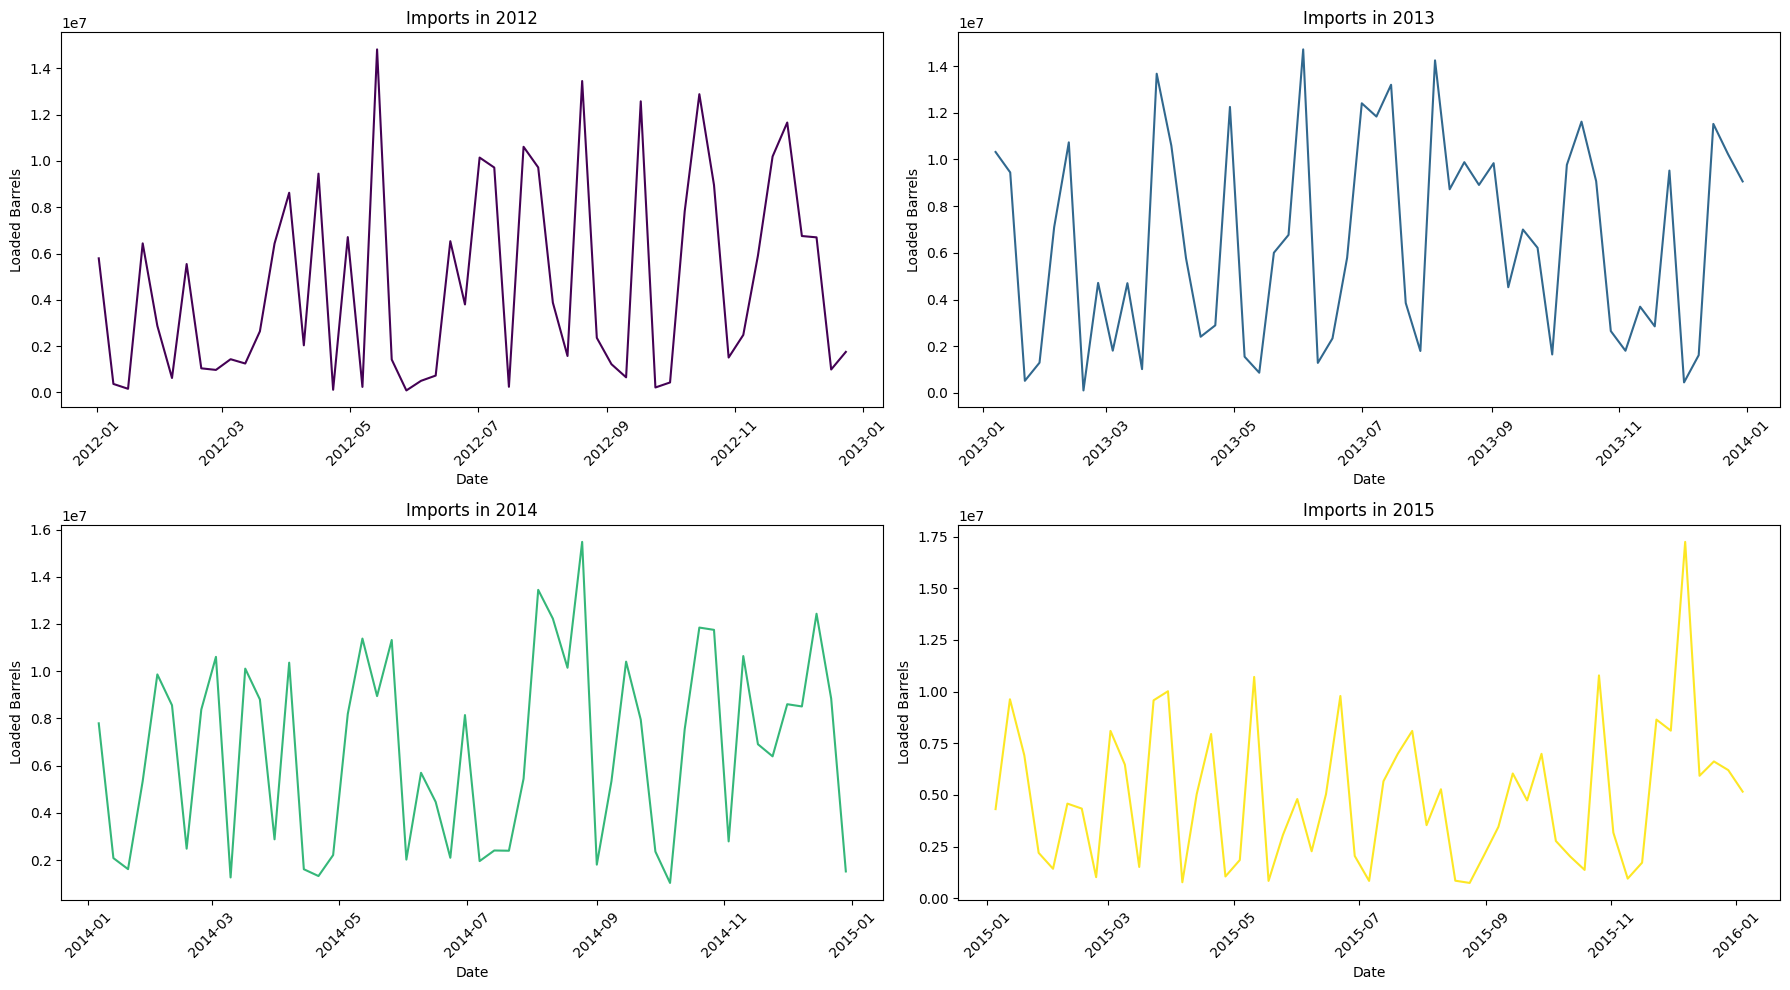

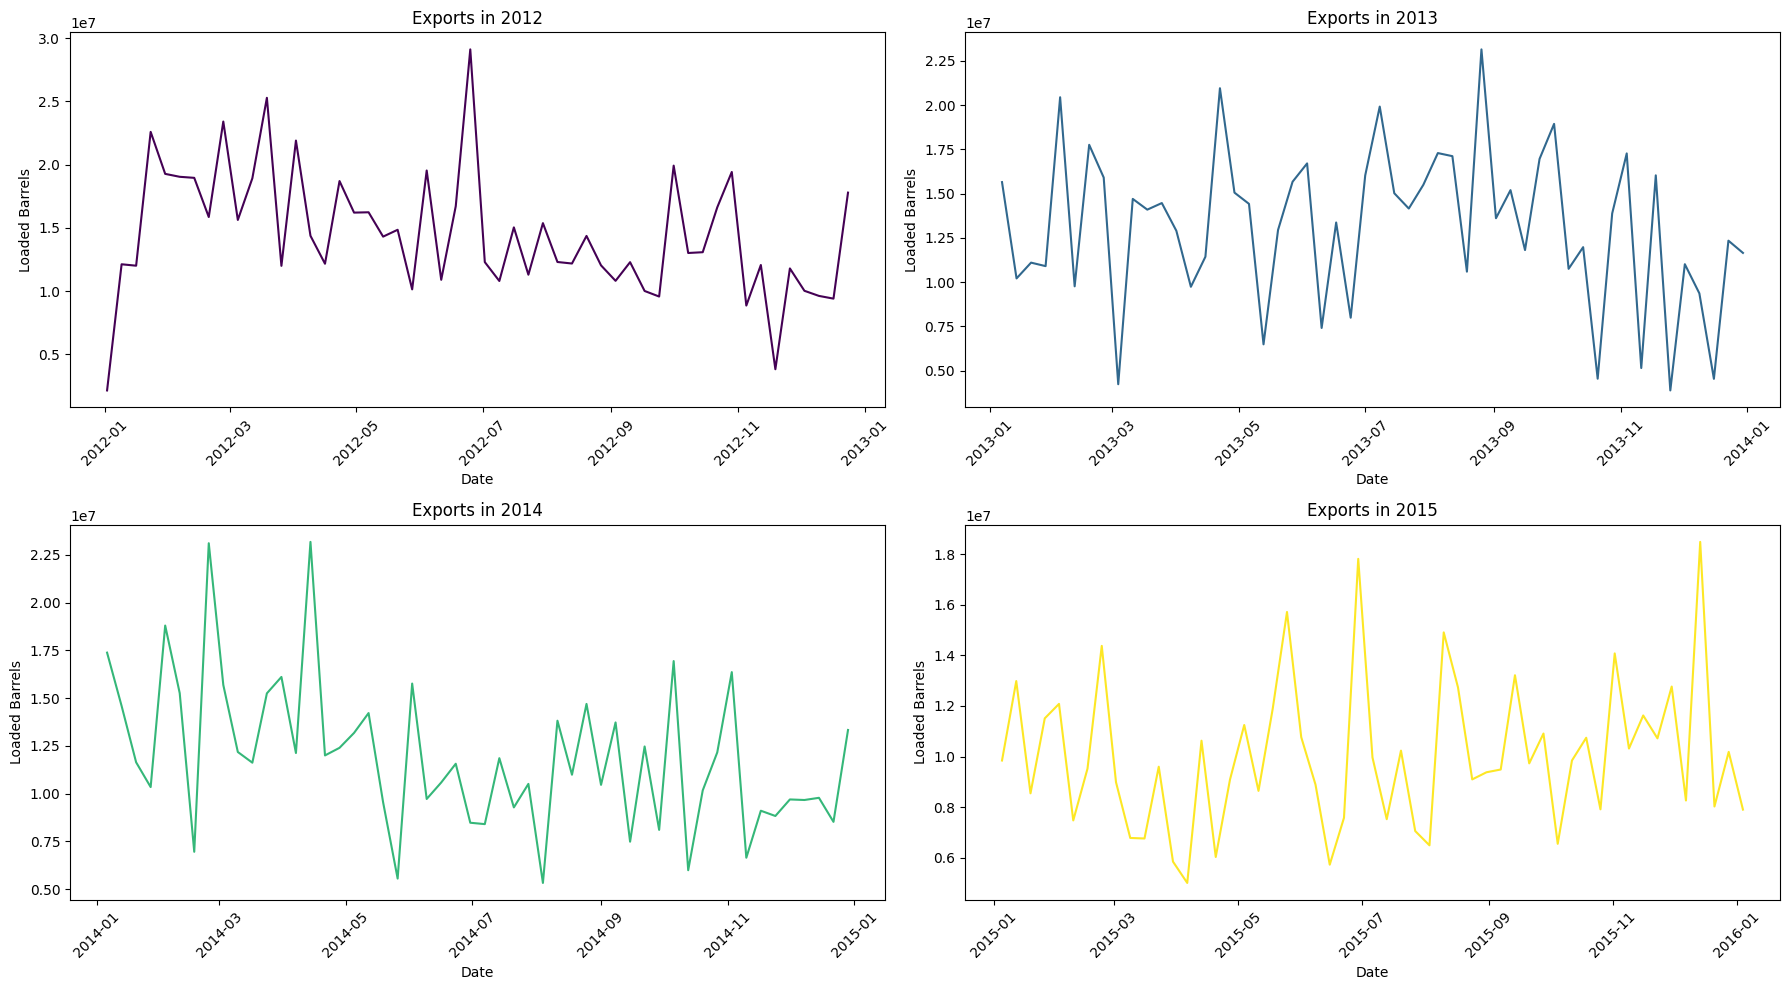

In [160]:
import matplotlib.pyplot as plt
import numpy as np
# Filtering data to exclude 2017
df_imports_filtered = df_imports[df_imports['year'] < 2016]
df_exports_filtered = df_exports[df_exports['year'] < 2016]
print(df_imports_filtered.describe())
print(df_exports_filtered.describe())

# Setting up the plot
plt.figure(figsize=(18, 10))

years = sorted(df_imports_filtered['year'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))

# Loop through each year and plot
for i, year in enumerate(years):
    # Demand
    plt.subplot(2, len(years)//2, i+1)
    df_year_imports = df_imports_filtered[df_imports_filtered['year'] == year]
    plt.plot(df_year_imports['date'], df_year_imports['loadedbarrels'], label=f'Imports, {year}', color=colors[i])
    plt.title(f'Imports in {year}')
    plt.xlabel('Date')
    plt.ylabel('Loaded Barrels')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"imports{year}timeseriesplots.png")


# New figure for supply plots
plt.figure(figsize=(18, 10))

# Loop through each year and plot for supply
for i, year in enumerate(years):
    plt.subplot(2, len(years)//2, i+1)
    df_year_exports = df_exports_filtered[df_exports_filtered['year'] == year]
    plt.plot(df_year_exports['date'], df_year_exports['loadedbarrels'], label=f'Exports, {year}', color=colors[i])
    plt.title(f'Exports in {year}')
    plt.xlabel('Date')
    plt.ylabel('Loaded Barrels')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"exports{year}timeseriesplots.png")

plt.show()

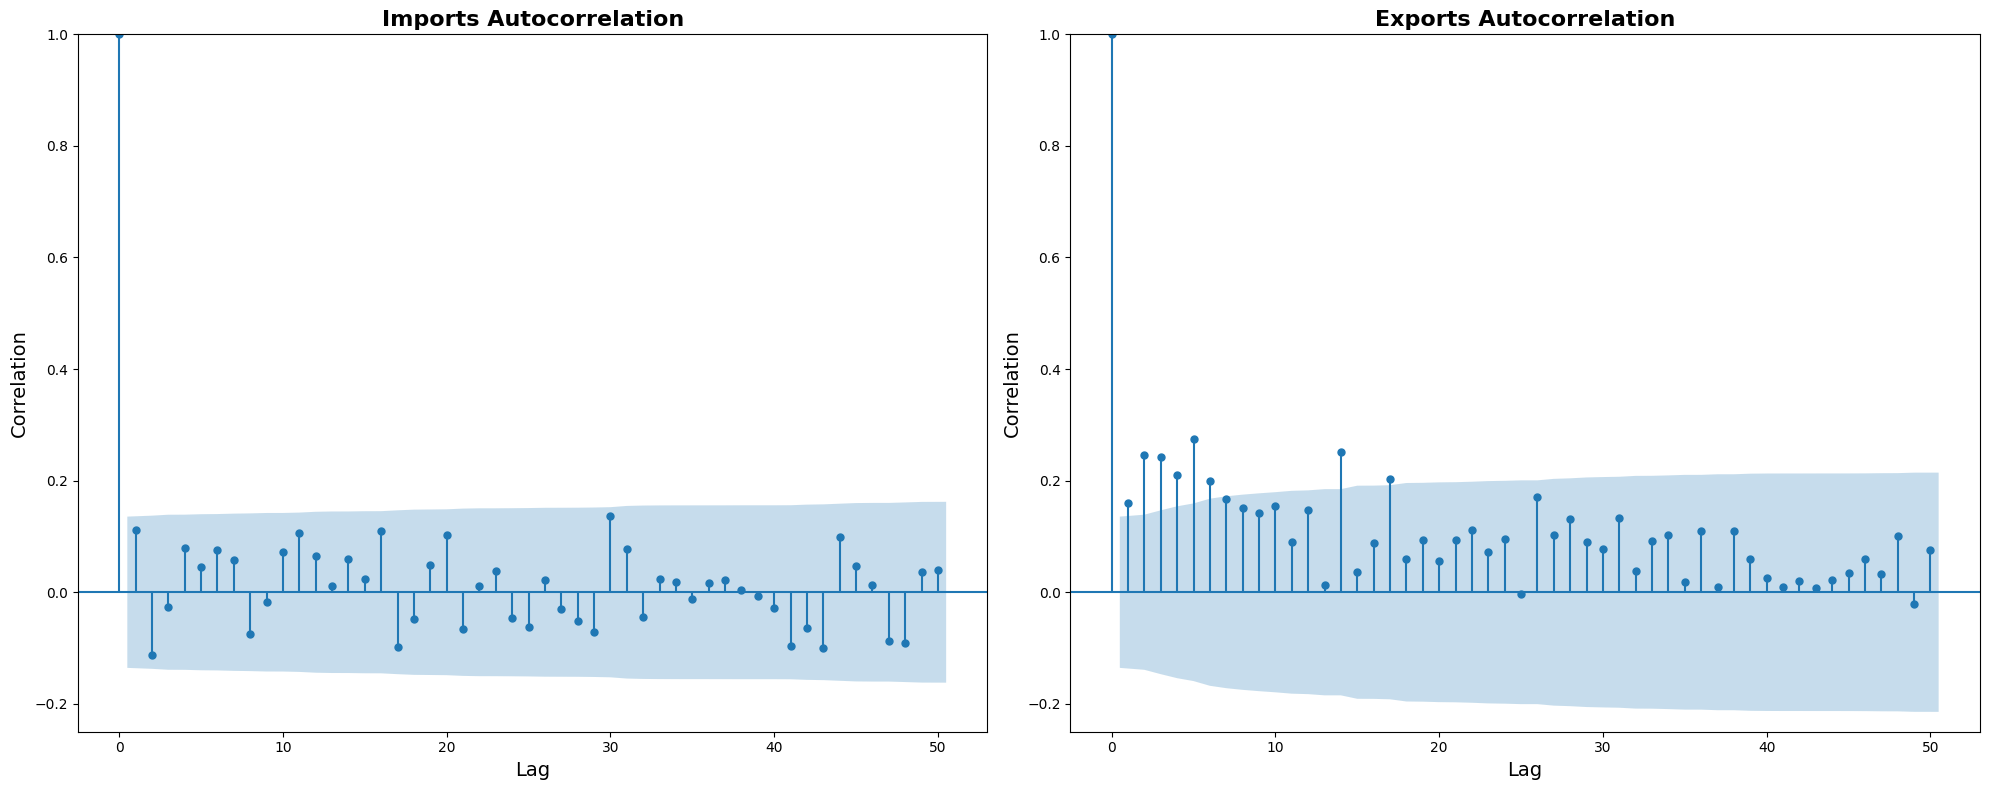

In [162]:
from statsmodels.graphics.tsaplots import plot_acf

# Make sure the data is sorted by date
df_imports_sorted = df_imports_filtered.sort_values(by='date')
df_exports_sorted = df_exports_filtered.sort_values(by='date')

# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))  # 20x8 figure with 2 subplots

# Autocorrelation plot for imports
plot_acf(df_imports_sorted['loadedbarrels'], lags=50, ax=axs[0])
axs[0].set_title('Imports Autocorrelation', fontsize=16, weight='bold')
axs[0].set_xlabel('Lag', fontsize=14)
axs[0].set_ylabel('Correlation', fontsize=14)
axs[0].set_ylim(-0.25, 1)  # Set y-axis limits for the first subplot

# Autocorrelation plot for exports
plot_acf(df_exports_sorted['loadedbarrels'], lags=50, ax=axs[1])
axs[1].set_title('Exports Autocorrelation', fontsize=16, weight='bold')
axs[1].set_xlabel('Lag', fontsize=14)
axs[1].set_ylabel('Correlation', fontsize=14)
axs[1].set_ylim(-0.25, 1)  # Set y-axis limits for the second subplot

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.savefig("importexportautocorr.png")  # Save the figure
plt.show()

In [165]:
from scipy.stats import kstest, norm

dfs = {'Import': df_imports_sorted, 'Export': df_exports_sorted}
analyses = ['Import', 'Export']
for analysis in analyses:
    data = dfs[analysis]['loadedbarrels']

    # Calculate the mean and standard deviation of the volumes
    mean, std = data.mean(), data.std()

    # Generate a normal distribution with the same mean and std as the data
    norm_dist = norm(loc=mean, scale=std)

    # Perform the K-S test
    stat, p = kstest(data, norm_dist.cdf)
    # compared with supply/demand distribution function found empirically
    # note norm_dist cdf is a highly accurate numerical representation of the
    # normal cdf

    print(f'{analysis}: Statistics={stat:.3f}, p={p}')

    # Interpret the results
    confidence_level = 0.95
    if p > 1 - confidence_level:
        print(f'{analysis} Sample looks Gaussian (fail to reject H0)')
    else:
        print(f'{analysis} Sample does not look Gaussian (reject H0)')

Import: Statistics=0.143, p=0.0003306652997458799
Import Sample does not look Gaussian (reject H0)
Export: Statistics=0.084, p=0.0979393888213943
Export Sample looks Gaussian (fail to reject H0)


In [166]:
from statsmodels.tsa.stattools import adfuller
# We use the adfuller function from stattools to do the ADF test:

for analysis in analyses:
    # Perform ADF test on the price time series
    result = adfuller(dfs[analysis]['loadedbarrels'])

    print(f'{analysis} ADF Statistic: {result[0]:.3f}')
    print(f'{analysis} p-value: {result[1]}')

    # Interpret the results
    alpha = 0.95
    if result[1] > 1 - alpha:
        print(f'{analysis} time series is non-stationary (fail to reject H0) since there is a unit root')
    else:
        print(f'{analysis} series is stationary (reject H0) since there is no unit root')

Import ADF Statistic: -10.858
Import p-value: 1.4736209556201114e-19
Import series is stationary (reject H0) since there is no unit root
Export ADF Statistic: -3.111
Export p-value: 0.025732501355845466
Export series is stationary (reject H0) since there is no unit root


In [154]:
print(df_supply_sorted.head())

   year  week  loadedbarrels       date
0  2012     1   2.156938e+06 2012-01-02
1  2012     2   1.212491e+07 2012-01-09
2  2012     3   1.201279e+07 2012-01-16
3  2012     4   2.258636e+07 2012-01-23
4  2012     5   1.926817e+07 2012-01-30


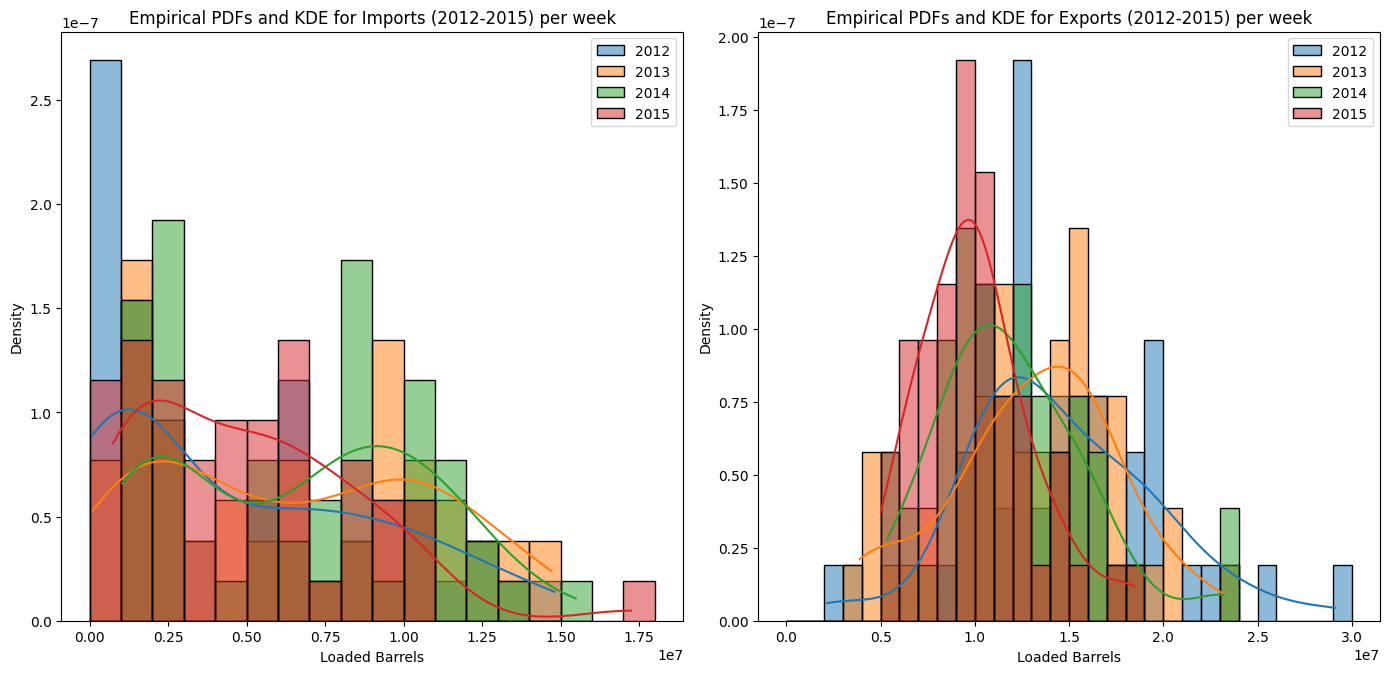

In [163]:
# empirical cdf, skewness, kurtosis
# Chebyshev's ineq
# weak law of large numbers (empirical cdf converging to actual)
# KDE

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # Import seaborn for KDE

# Assuming df_supply_sorted and df_demand_sorted are already defined and include data for years 2012 to 2015

plt.figure(figsize=(14, 7))

# Plot empirical PDFs and KDE for supply for each year
plt.subplot(1, 2, 1)
for year in years:
    data_year = df_imports_sorted[df_imports_sorted['date'].dt.year == year]['loadedbarrels'].dropna()
    sns.histplot(data_year, bins=np.arange(0, data_year.max() + 1e6, 1e6), kde=True, stat='density', alpha=0.5, label=f'{year}')
plt.title('Empirical PDFs and KDE for Imports (2012-2015) per week')
plt.xlabel('Loaded Barrels')
plt.ylabel('Density')
plt.legend()

# Plot empirical PDFs and KDE for demand for each year
plt.subplot(1, 2, 2)
for year in years:
    data_year = df_exports_sorted[df_exports_sorted['date'].dt.year == year]['loadedbarrels'].dropna()
    sns.histplot(data_year, bins=np.arange(0, data_year.max() + 1e6, 1e6), kde=True, stat='density', alpha=0.5, label=f'{year}')
plt.title('Empirical PDFs and KDE for Exports (2012-2015) per week')
plt.xlabel('Loaded Barrels')
plt.ylabel('Density')
plt.legend()

plt.savefig("empPDFvsKDE.png")
plt.tight_layout()
plt.show()

In [156]:
# Initialize dictionaries to store results, including skewness and kurtosis
imports_stats = {'Year': [], 'Mean': [], 'Standard Deviation': [], 'Skewness': [], 'Excess Kurtosis': []}
exports_stats = {'Year': [], 'Mean': [], 'Standard Deviation': [], 'Skewness': [], 'Excess Kurtosis': []}

for year in years:
    # Supply data for the year
    imports_data_year = df_imports_sorted[df_imports_sorted['date'].dt.year == year]['loadedbarrels'].dropna()
    # Demand data for the year
    exports_data_year = df_exports_sorted[df_exports_sorted['date'].dt.year == year]['loadedbarrels'].dropna()
    
    # Calculate statistics for supply, including skewness and kurtosis
    imports_stats['Year'].append(year)
    imports_stats['Mean'].append(imports_data_year.mean())
    imports_stats['Standard Deviation'].append(imports_data_year.std())
    imports_stats['Skewness'].append(imports_data_year.skew())
    imports_stats['Excess Kurtosis'].append(imports_data_year.kurt())
    
    # Calculate statistics for demand, including skewness and kurtosis
    exports_stats['Year'].append(year)
    exports_stats['Mean'].append(exports_data_year.mean())
    exports_stats['Standard Deviation'].append(exports_data_year.std())
    exports_stats['Skewness'].append(exports_data_year.skew())
    exports_stats['Excess Kurtosis'].append(exports_data_year.kurt())

# Convert dictionaries to DataFrames for easy viewing
imports_stats_df = pd.DataFrame(imports_stats)
exports_stats_df = pd.DataFrame(exports_stats)

imports_stats_df, exports_stats_df

(   Year          Mean  Standard Deviation  Skewness  Excess Kurtosis
 0  2012  4.712009e+06        4.337789e+06  0.676997        -0.807365
 1  2013  6.473155e+06        4.381796e+06  0.172395        -1.322022
 2  2014  6.685700e+06        4.016382e+06  0.086158        -1.220730
 3  2015  4.927395e+06        3.515961e+06  0.971037         1.328037,
    Year          Mean  Standard Deviation  Skewness  Excess Kurtosis
 0  2012  1.454295e+07        5.022839e+06  0.406656         0.888689
 1  2013  1.311630e+07        4.467676e+06 -0.258442        -0.139661
 2  2014  1.195717e+07        3.906103e+06  0.803877         1.011995
 3  2015  1.007132e+07        2.955416e+06  0.781189         0.719064)

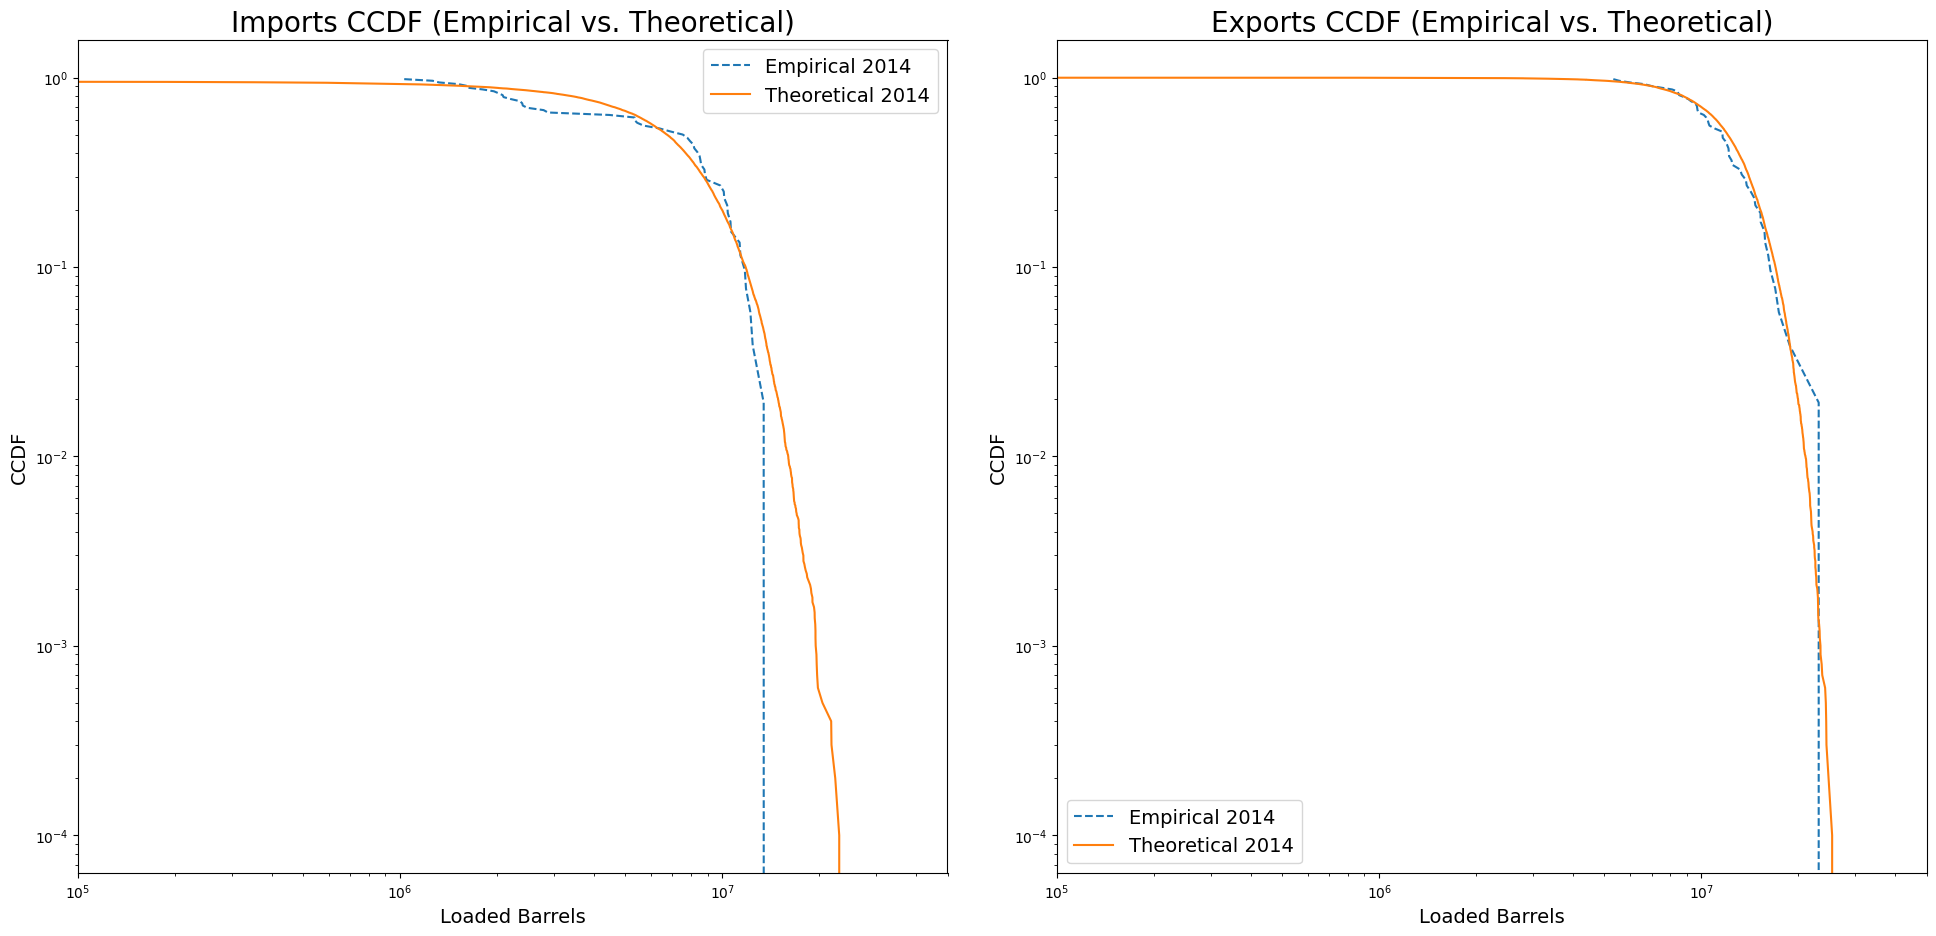

In [164]:
from scipy.stats import norm

year = 2014

# Increase figure size
plt.figure(figsize=(20, 10))

# Plot for Exports
plt.subplot(1, 2, 1)

# Empirical data
data_year = df_imports_sorted[df_imports_sorted['date'].dt.year == year]['loadedbarrels'].dropna()
sorted_data = np.sort(data_year)
ccdf = 1. - np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.loglog(sorted_data, ccdf, label=f'Empirical {year}', linestyle='--')

# Theoretical CCDF
mean_val = imports_stats_df[imports_stats_df['Year'] == year]['Mean'].values[0]
std_val = imports_stats_df[imports_stats_df['Year'] == year]['Standard Deviation'].values[0]
theoretical_vals = norm.rvs(loc=mean_val, scale=std_val, size=10000)
sorted_theoretical = np.sort(theoretical_vals)
theoretical_ccdf = 1. - np.arange(1, len(sorted_theoretical) + 1) / len(sorted_theoretical)
plt.loglog(sorted_theoretical, theoretical_ccdf, label=f'Theoretical {year}')
plt.xlim(10**5, 5*10**7)
plt.title('Imports CCDF (Empirical vs. Theoretical)', fontsize=20)
plt.xlabel('Loaded Barrels', fontsize=14)
plt.ylabel('CCDF', fontsize=14)
plt.legend(fontsize=14)

# Plot for Imports
plt.subplot(1, 2, 2)

# Empirical data
data_year = df_exports_sorted[df_exports_sorted['date'].dt.year == year]['loadedbarrels'].dropna()
sorted_data = np.sort(data_year)
ccdf = 1. - np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.loglog(sorted_data, ccdf, label=f'Empirical {year}', linestyle='--')

# Theoretical CCDF
mean_val = exports_stats_df[exports_stats_df['Year'] == year]['Mean'].values[0]
std_val = exports_stats_df[exports_stats_df['Year'] == year]['Standard Deviation'].values[0]
theoretical_vals = norm.rvs(loc=mean_val, scale=std_val, size=10000) # monte carlo simulations to obtain good approximation to theoretical curve
sorted_theoretical = np.sort(theoretical_vals)
theoretical_ccdf = 1. - np.arange(1, len(sorted_theoretical) + 1) / len(sorted_theoretical)
plt.loglog(sorted_theoretical, theoretical_ccdf, label=f'Theoretical {year}')
plt.xlim(10**5, 5*10**7)
plt.title('Exports CCDF (Empirical vs. Theoretical)', fontsize=20)
plt.xlabel('Loaded Barrels', fontsize=14)
plt.ylabel('CCDF', fontsize=14)
plt.legend(fontsize=14)

# Adjust subplot parameters to give specified padding
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3, hspace=0.2)

# Use tight_layout with padding
plt.tight_layout(pad=3.0)
plt.savefig("CCDFplots.png")
plt.show()
# empirical data exhibits characteristics of a distribution with thinner tails than the theoretical normal model.